<a href="https://colab.research.google.com/github/MahimnaDarji/Cricket-Analysis/blob/main/IPL_Stats_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
deliveries=pd.read_csv('/content/drive/MyDrive/DATASETS/deliveries_updated_mens_ipl.csv')

In [8]:
deliveries.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

def playerStatistics(df):
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    return df

In [10]:
df = playerStatistics(deliveries)

In [11]:
df.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,11,161,139,9,57,53,11,0,11,7,115.827338,14.636364,15.444444,7.722222
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000


In [12]:
def phase(over):
  if over < 6:
    return 'Powerplay'
  elif over<=15:
    return 'Middle Overs'
  else:
    return 'Death Overs'

In [13]:
deliveries['phase']=deliveries['over'].apply(lambda x: phase(x))

In [14]:
def phaseofplay(df,currentphase):
  df=df[df.phase == currentphase]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #runs per innings
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  
  return df

In [15]:
pp_stats=phaseofplay(deliveries,'Powerplay')
mo_stats=phaseofplay(deliveries,'Middle Overs')
do_stats=phaseofplay(deliveries,'Death Overs')

<ipython-input-14-0da16a9c6b6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
<ipython-input-14-0da16a9c6b6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
<ipython-input-14-0da16a9c6b6c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

#Some stats of Powerplay

In [16]:
pp_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      3157
DA Warner     2894
CH Gayle      2405
G Gambhir     2277
V Kohli       2135
AM Rahane     2049
RV Uthappa    2037
PA Patel      1904
RG Sharma     1634
Q de Kock     1634
Name: runs, dtype: int64

[]

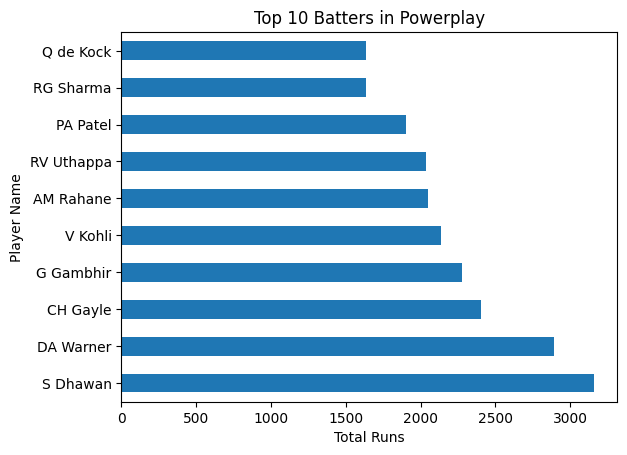

In [17]:
pp_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Total Runs')
plt.ylabel('Player Name')
plt.title('Top 10 Batters in Powerplay')
plt.plot()

In [18]:
pp_stats.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      415
DA Warner     370
G Gambhir     310
PA Patel      283
AM Rahane     273
V Kohli       271
CH Gayle      267
RV Uthappa    261
V Sehwag      230
SK Raina      198
Name: fours, dtype: int64

In [19]:
pp_stats.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle       145
DA Warner       89
S Dhawan        71
BB McCullum     70
Q de Kock       65
RG Sharma       63
KL Rahul        62
SK Raina        55
JC Buttler      55
SR Watson       54
Name: sixes, dtype: int64

In [20]:
pp_stats.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      1225
DA Warner     1023
CH Gayle      1017
G Gambhir      893
AM Rahane      890
V Kohli        878
PA Patel       818
RV Uthappa     806
RG Sharma      739
M Vijay        717
Name: dots, dtype: int64

In [21]:
pp_stats.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      840
V Kohli       595
G Gambhir     593
DA Warner     570
AM Rahane     550
RV Uthappa    488
PA Patel      418
KL Rahul      407
CH Gayle      379
RG Sharma     378
Name: ones, dtype: int64

In [22]:
pp_stats.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
DA Warner     124
G Gambhir     105
S Dhawan       88
M Vijay        87
V Kohli        84
RV Uthappa     77
AM Rahane      76
PA Patel       74
KL Rahul       62
Q de Kock      59
Name: twos, dtype: int64

#Some Stats of Middle Overs

In [23]:
mo_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           3508
SK Raina          3312
RG Sharma         3102
AB de Villiers    3019
KD Karthik        2698
S Dhawan          2650
AT Rayudu         2602
DA Warner         2590
RV Uthappa        2502
MS Dhoni          2389
Name: runs, dtype: int64

[]

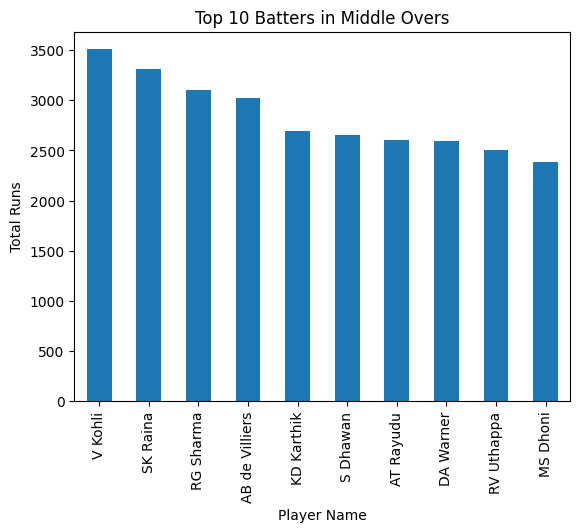

In [24]:
mo_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Top 10 Batters in Middle Overs')
plt.plot()

In [25]:
mo_stats.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina          254
KD Karthik        250
S Dhawan          243
RG Sharma         241
V Kohli           240
AB de Villiers    208
AT Rayudu         192
RV Uthappa        191
SR Watson         182
DA Warner         169
Name: fours, dtype: int64

In [26]:
mo_stats.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          179
AB de Villiers    121
SK Raina          119
SR Watson         119
V Kohli           112
DA Warner         107
YK Pathan         107
RV Uthappa        105
RG Sharma         100
Yuvraj Singh       99
Name: sixes, dtype: int64

In [27]:
mo_stats.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          904
V Kohli           883
RG Sharma         870
SK Raina          779
KD Karthik        776
Yuvraj Singh      721
RV Uthappa        709
AT Rayudu         702
S Dhawan          664
AB de Villiers    639
Name: dots, dtype: int64

In [28]:
mo_stats.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           1408
RG Sharma         1242
SK Raina          1242
AB de Villiers    1058
S Dhawan          1031
AT Rayudu         1020
MS Dhoni          1014
KD Karthik         993
DA Warner          873
MK Pandey          868
Name: ones, dtype: int64

In [29]:
mo_stats.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           225
DA Warner         195
AB de Villiers    185
KD Karthik        166
SK Raina          164
MS Dhoni          158
S Dhawan          157
RG Sharma         142
AM Rahane         129
G Gambhir         128
Name: twos, dtype: int64

#Some stats of Death Overs

In [30]:
do_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          2530
KA Pollard        1708
AB de Villiers    1421
KD Karthik        1282
RA Jadeja         1155
RG Sharma         1145
HH Pandya          998
V Kohli            991
YK Pathan          858
AD Russell         854
Name: runs, dtype: int64

[]

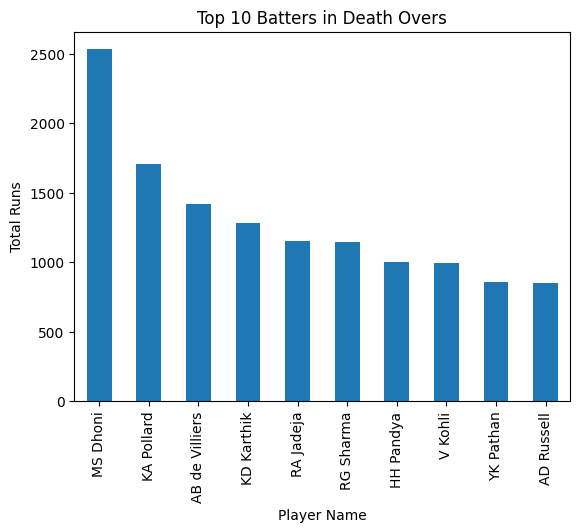

In [31]:
do_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Top 10 Batters in Death Overs')
plt.plot()

In [32]:
do_stats.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          195
KD Karthik        121
KA Pollard        110
AB de Villiers    106
RG Sharma          90
RA Jadeja          86
YK Pathan          76
HH Pandya          71
V Kohli            70
AT Rayudu          64
Name: fours, dtype: int64

In [33]:
do_stats.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          152
KA Pollard        127
AB de Villiers    112
RG Sharma          78
AD Russell         77
HH Pandya          72
KD Karthik         69
V Kohli            64
RA Jadeja          55
DA Miller          50
Name: sixes, dtype: int64

In [34]:
do_stats.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni           415
KA Pollard         344
RA Jadeja          219
KD Karthik         215
HH Pandya          191
AD Russell         171
RG Sharma          170
AB de Villiers     157
Harbhajan Singh    153
YK Pathan          147
Name: dots, dtype: int64

In [35]:
def byInnings(df,current_innings):
  df=df[df.inning == current_innings]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #runs per innings
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  
  return df

In [36]:
firstinn=byInnings(deliveries,1)
secondinn=byInnings(deliveries,2)

<ipython-input-35-5fc641501671>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
<ipython-input-35-5fc641501671>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
<ipython-input-35-5fc641501671>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [37]:
firstinn.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,13,166,115,7,32,53,13,1,6,10,144.347826,12.769231,16.428571,7.187500
1,A Badoni,5,106,89,5,32,38,8,0,7,4,119.101124,21.200000,17.800000,8.090909
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,5,51,72,4,44,19,2,0,7,0,70.833333,10.200000,18.000000,10.285714
4,A Choudhary,1,15,12,0,1,9,1,0,1,0,125.000000,15.000000,12.000000,12.000000


In [38]:
secondinn.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,10,114,81,8,29,30,7,0,10,5,140.740741,11.400000,10.125,5.400000
1,A Badoni,6,55,50,4,25,15,3,0,4,3,110.000000,9.166667,12.500,7.142857
2,A Chopra,1,2,3,1,1,2,0,0,0,0,66.666667,2.000000,3.000,3.000000
3,A Choudhary,2,10,8,2,3,4,0,0,0,1,125.000000,5.000000,4.000,8.000000
4,A Flintoff,2,40,43,2,21,15,2,1,3,1,93.023256,20.000000,21.500,10.750000


#Some Stats of 1st Innings


In [39]:
firstinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           3554
S Dhawan          3537
RG Sharma         3415
SK Raina          3194
AB de Villiers    3163
DA Warner         3042
MS Dhoni          2923
CH Gayle          2873
KD Karthik        2497
RV Uthappa        2120
Name: runs, dtype: int64

[]

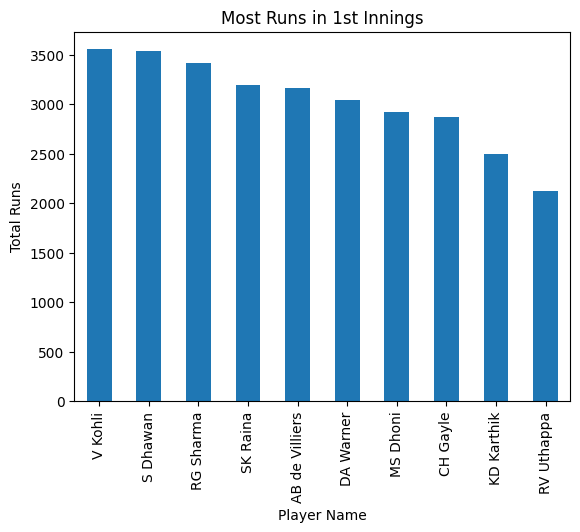

In [40]:
firstinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs in 1st Innings')
plt.plot()

In [41]:
firstinn.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          389
RG Sharma         307
V Kohli           291
DA Warner         285
SK Raina          277
AB de Villiers    254
CH Gayle          240
KD Karthik        230
AM Rahane         224
MS Dhoni          211
Name: fours, dtype: int64

In [42]:
firstinn.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          201
AB de Villiers    159
RG Sharma         145
MS Dhoni          132
V Kohli           122
KA Pollard        119
SK Raina          118
DA Warner         114
AD Russell         94
KD Karthik         90
Name: sixes, dtype: int64

In [43]:
firstinn.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      1096
V Kohli       1002
RG Sharma      956
CH Gayle       870
DA Warner      840
SK Raina       837
MS Dhoni       769
RV Uthappa     710
KD Karthik     693
AM Rahane      660
Name: dots, dtype: int64

In [44]:
firstinn.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           1215
S Dhawan          1153
RG Sharma         1017
SK Raina          1008
MS Dhoni           856
DA Warner          833
AB de Villiers     825
KD Karthik         737
AT Rayudu          692
AM Rahane          684
Name: ones, dtype: int64

In [45]:
firstinn.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           211
MS Dhoni          202
SK Raina          176
DA Warner         169
AB de Villiers    169
S Dhawan          149
RG Sharma         144
KD Karthik        135
AM Rahane         114
MK Pandey         108
Name: twos, dtype: int64

#Some Stats of 2nd Innings

In [46]:
secondinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli       3070
DA Warner     2839
RV Uthappa    2832
S Dhawan      2707
RG Sharma     2464
G Gambhir     2460
SK Raina      2334
SR Watson     2162
AT Rayudu     2140
CH Gayle      2092
Name: runs, dtype: int64

[]

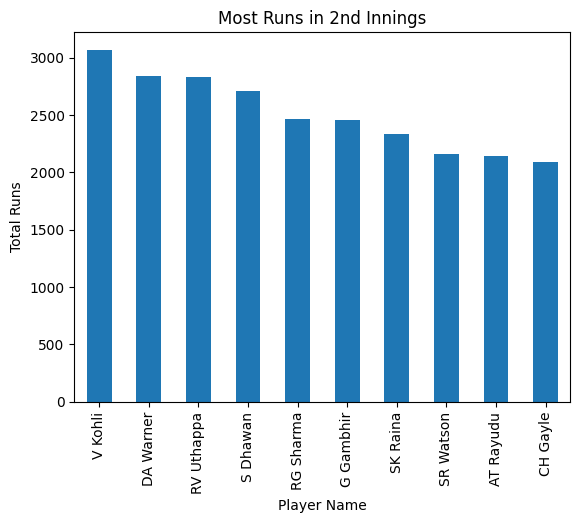

In [47]:
secondinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs in 2nd Innings')
plt.plot()

In [48]:
secondinn.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      312
G Gambhir     296
DA Warner     292
V Kohli       288
RV Uthappa    280
SK Raina      229
RG Sharma     212
SR Watson     210
AM Rahane     207
PA Patel      197
Name: fours, dtype: int64

In [49]:
secondinn.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          156
SR Watson         110
RV Uthappa        110
YK Pathan         109
KA Pollard        104
DA Warner         102
V Kohli            97
MS Dhoni           97
RG Sharma          96
AB de Villiers     92
Name: sixes, dtype: int64

In [50]:
secondinn.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
RV Uthappa    888
V Kohli       884
S Dhawan      862
G Gambhir     831
RG Sharma     822
DA Warner     793
CH Gayle      764
AM Rahane     681
AT Rayudu     677
SR Watson     670
Name: dots, dtype: int64

In [51]:
secondinn.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli       966
S Dhawan      828
RG Sharma     818
G Gambhir     809
AT Rayudu     751
RV Uthappa    750
SK Raina      700
AM Rahane     687
DA Warner     680
MK Pandey     680
Name: ones, dtype: int64

In [52]:
secondinn.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
DA Warner     176
V Kohli       167
G Gambhir     148
RV Uthappa    135
MS Dhoni      131
S Dhawan      130
AM Rahane     113
SV Samson     109
KL Rahul      109
KD Karthik    105
Name: twos, dtype: int64

In [53]:
comp=firstinn[['batsman','RPI']].merge(secondinn[['batsman','RPI']],on='batsman',how='inner').rename(columns={'RPI_x':'1st_RPI','RPI_y':'2nd_RPI'})
comp.head(5)

,batsman,1st_RPI,2nd_RPI
0,A Ashish Reddy,12.769231,11.400000
1,A Badoni,21.200000,9.166667
2,A Chopra,10.200000,2.000000
3,A Choudhary,15.000000,5.000000
4,A Flintoff,22.000000,20.000000


[]

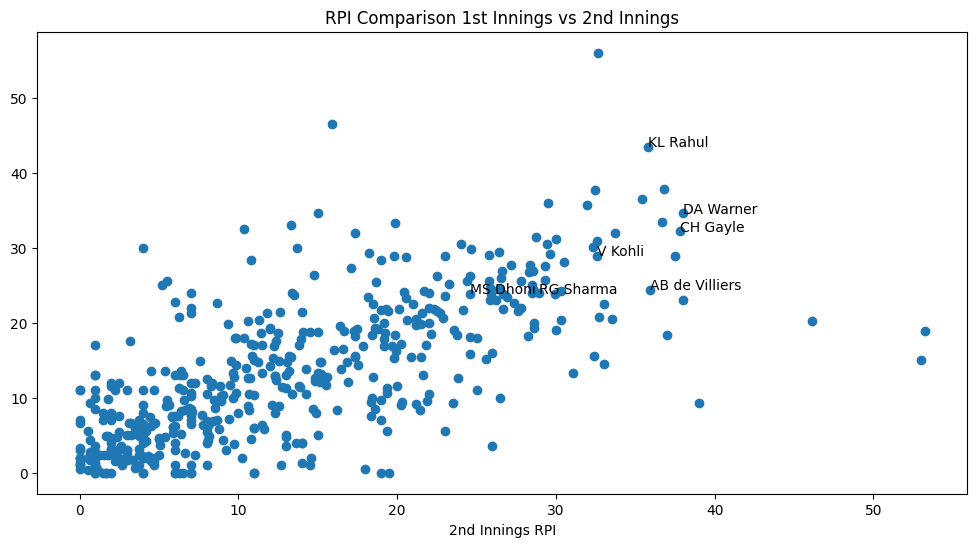

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(comp['1st_RPI'],comp['2nd_RPI'])
plt.xlabel('1st Innings RPI')
plt.xlabel('2nd Innings RPI')
plt.title('RPI Comparison 1st Innings vs 2nd Innings')

annotations=list(comp['batsman'])
players=['CH Gayle','V Kohli','RG Sharma','KL Rahul','DA Warner','AB de Villiers','MS Dhoni']

for i,label in enumerate(annotations):
  if label in players:
    plt.annotate(label,(comp['1st_RPI'][i],comp['2nd_RPI'][i]))
plt.plot()

In [55]:
comp1=firstinn[['batsman','BPD']].merge(secondinn[['batsman','BPD']],on='batsman',how='inner')
comp1.head(5)

,batsman,BPD_x,BPD_y
0,A Ashish Reddy,16.428571,10.125
1,A Badoni,17.800000,12.500
2,A Chopra,18.000000,3.000
3,A Choudhary,12.000000,4.000
4,A Flintoff,14.000000,21.500


[]

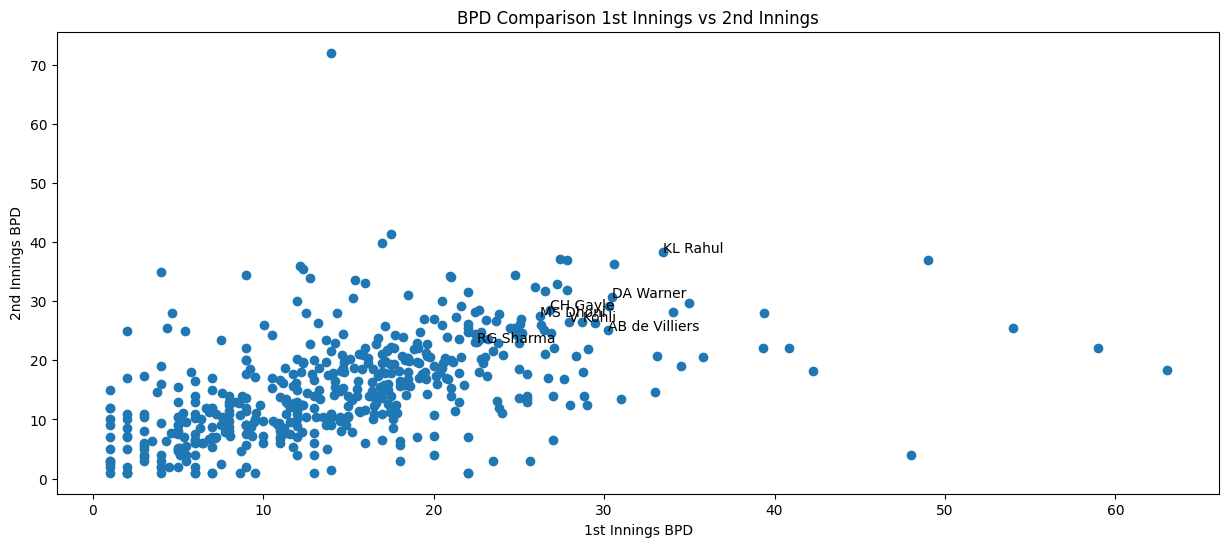

In [56]:
plt.figure(figsize=(15,6))
plt.scatter(comp1['BPD_x'],comp1['BPD_y'])
plt.xlabel('1st Innings BPD')
plt.ylabel('2nd Innings BPD')
plt.title('BPD Comparison 1st Innings vs 2nd Innings')

annotations=list(comp1['batsman'])
players=['CH Gayle','V Kohli','RG Sharma','KL Rahul','DA Warner','AB de Villiers','MS Dhoni']

for i,label in enumerate(annotations):
  if label in players:
    plt.annotate(label,(comp1['BPD_x'][i],comp1['BPD_y'][i]))

plt.plot()

In [57]:
def statsbyteam(df,team):

  df=df[df.bowling_team==team]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #runs per innings
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  
  return df

#Stats vs MI


In [58]:
againstmi=statsbyteam(deliveries,'Mumbai Indians')

<ipython-input-57-48628cf7252b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
<ipython-input-57-48628cf7252b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
<ipython-input-57-48628cf7252b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [59]:
againstmi.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,2,27,25,2,12,7,4,0,0,2,108.000000,13.5,12.5,12.500000
1,A Badoni,1,14,11,1,3,6,1,0,0,1,127.272727,14.0,11.0,11.000000
2,A Chopra,1,1,4,0,3,1,0,0,0,0,25.000000,1.0,4.0,4.000000
3,A Flintoff,1,24,25,1,14,7,0,1,2,1,96.000000,24.0,25.0,8.333333
4,A Kumble,3,9,12,0,6,5,0,0,1,0,75.000000,3.0,12.0,12.000000


In [60]:
againstmi.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
KL Rahul          871
S Dhawan          871
SK Raina          824
AB de Villiers    791
V Kohli           774
MS Dhoni          746
CH Gayle          715
MK Pandey         710
DA Warner         666
AM Rahane         625
Name: runs, dtype: int64

[]

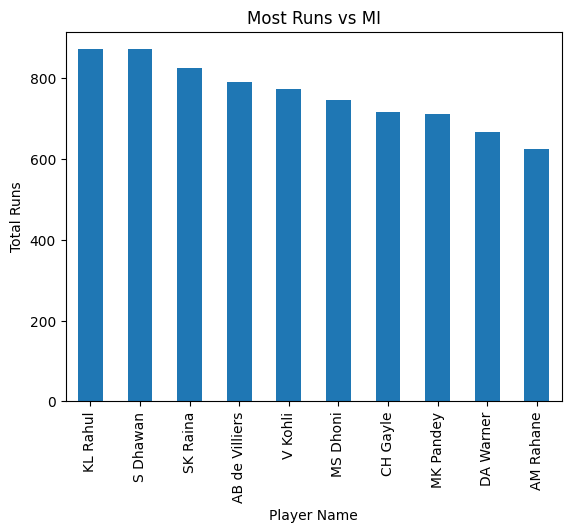

In [61]:
againstmi.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs vs MI')
plt.plot()

In [62]:
againstmi.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle      281
S Dhawan      273
MS Dhoni      242
V Kohli       235
RV Uthappa    226
KL Rahul      225
SK Raina      223
AM Rahane     214
SR Watson     210
M Vijay       197
Name: dots, dtype: int64

In [63]:
againstmi.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          95
AB de Villiers    72
AM Rahane         70
KL Rahul          68
SK Raina          68
V Kohli           65
DA Warner         64
CH Gayle          62
MK Pandey         57
MS Dhoni          57
Name: fours, dtype: int64

In [64]:
againstmi.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          45
AB de Villiers    36
SK Raina          35
MS Dhoni          34
KL Rahul          34
JC Buttler        29
V Kohli           27
RV Uthappa        26
MK Pandey         25
DA Warner         25
Name: sixes, dtype: int64

#Stats vs CSK


In [65]:
againstcsk=statsbyteam(deliveries,'Chennai Super Kings')

<ipython-input-57-48628cf7252b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
<ipython-input-57-48628cf7252b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
<ipython-input-57-48628cf7252b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [66]:
againstcsk.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,3,45,25,2,8,8,2,1,3,3,180.000000,15.00,12.5,4.166667
1,A Badoni,1,19,14,0,7,3,2,0,0,2,135.714286,19.00,14.0,7.000000
2,A Kumble,2,3,6,0,4,1,1,0,0,0,50.000000,1.50,6.0,6.000000
3,A Manohar,1,12,12,1,6,4,0,0,2,0,100.000000,12.00,12.0,6.000000
4,A Mishra,8,58,64,5,35,16,6,0,6,1,90.625000,7.25,12.8,9.142857


In [67]:
againstcsk.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          1029
V Kohli            979
RG Sharma          770
KD Karthik         647
KA Pollard         583
DA Warner          558
RV Uthappa         547
AB de Villiers     532
SR Watson          480
KL Rahul           435
Name: runs, dtype: int64

[]

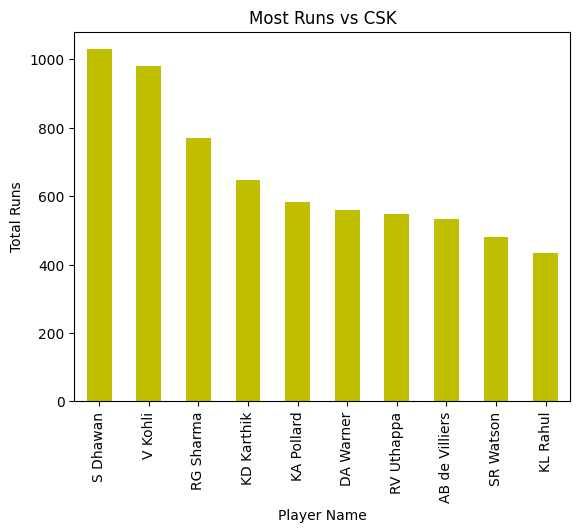

In [77]:
againstcsk.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='y')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs vs CSK')
plt.plot()

In [69]:
againstcsk.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli       301
S Dhawan      296
RG Sharma     236
KD Karthik    191
RV Uthappa    176
DA Warner     168
CH Gayle      168
G Gambhir     140
MK Pandey     136
KA Pollard    135
Name: dots, dtype: int64

In [70]:
againstcsk.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          114
V Kohli            72
KD Karthik         71
RG Sharma          69
DA Warner          55
RV Uthappa         54
G Gambhir          49
V Sehwag           48
SR Tendulkar       45
AB de Villiers     42
Name: fours, dtype: int64

In [71]:
againstcsk.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
KA Pollard        44
V Kohli           37
CH Gayle          30
SR Watson         27
RG Sharma         26
AD Russell        26
AB de Villiers    25
S Dhawan          21
KL Rahul          20
RV Uthappa        20
Name: sixes, dtype: int64

#Stats vs RCB

In [72]:
againstrcb=statsbyteam(deliveries,'Royal Challengers Bangalore')

<ipython-input-57-48628cf7252b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
<ipython-input-57-48628cf7252b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
<ipython-input-57-48628cf7252b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [73]:
againstrcb.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,5,55,42,4,15,19,2,0,2,4,130.952381,11.0,10.5,7.000000
1,A Badoni,1,13,13,1,7,3,1,0,2,0,100.000000,13.0,13.0,6.500000
2,A Chandila,1,4,6,0,2,4,0,0,0,0,66.666667,4.0,6.0,6.000000
3,A Chopra,1,2,5,1,3,2,0,0,0,0,40.000000,2.0,5.0,5.000000
4,A Flintoff,1,22,14,0,3,8,0,0,2,1,157.142857,22.0,14.0,4.666667


In [74]:
againstrcb.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni      838
DA Warner     820
RG Sharma     785
AT Rayudu     714
SK Raina      702
RV Uthappa    687
S Dhawan      679
AM Rahane     648
G Gambhir     647
KL Rahul      610
Name: runs, dtype: int64

[]

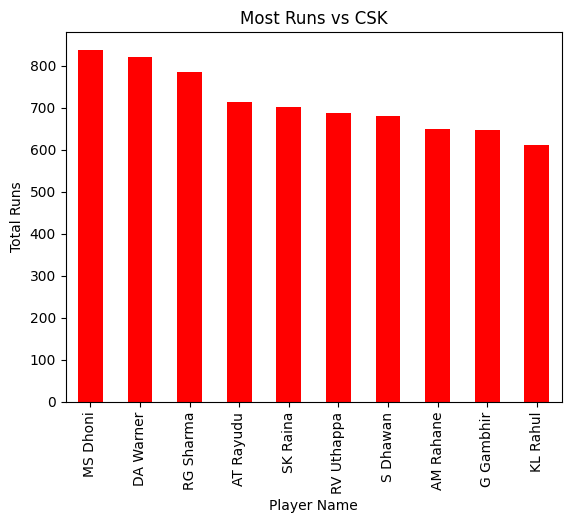

In [76]:
againstrcb.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='r')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs vs CSK')
plt.plot()

In [78]:
againstrcb.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina       229
RG Sharma      226
AT Rayudu      225
MS Dhoni       217
S Dhawan       209
RV Uthappa     203
DA Warner      190
AM Rahane      188
G Gambhir      181
BB McCullum    163
Name: dots, dtype: int64

In [79]:
againstrcb.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
G Gambhir      78
DA Warner      74
S Dhawan       73
AM Rahane      73
RG Sharma      72
RV Uthappa     70
SK Raina       63
BB McCullum    55
AT Rayudu      55
MS Dhoni       51
Name: fours, dtype: int64

In [80]:
againstrcb.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni       46
DA Warner      43
AD Russell     38
KL Rahul       35
RG Sharma      34
KA Pollard     32
SK Raina       31
BB McCullum    30
AT Rayudu      29
RV Uthappa     27
Name: sixes, dtype: int64

#Stats of Some Big Players vs Teams

[]

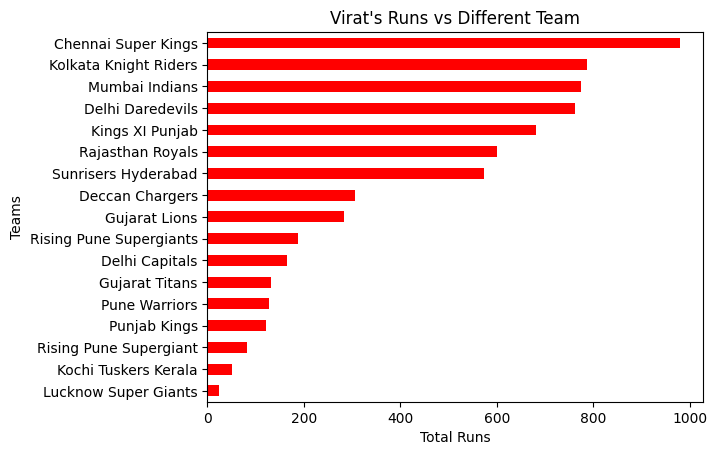

In [85]:
deliveries[deliveries.batsman=='V Kohli'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='r')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("Virat's Runs vs Different Team")
plt.plot()

[]

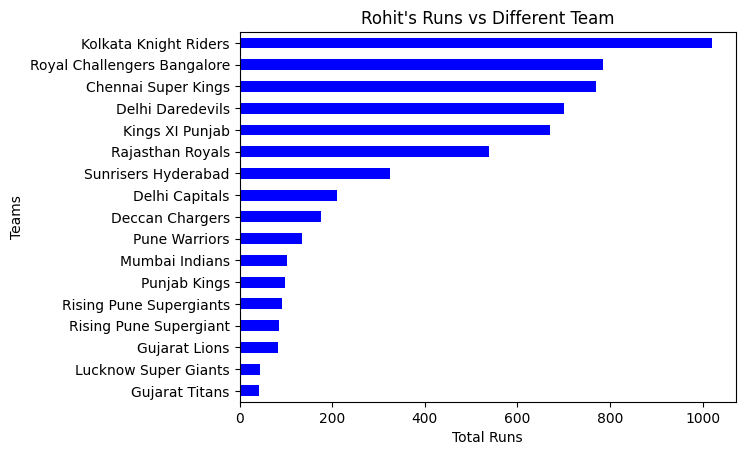

In [86]:
deliveries[deliveries.batsman=='RG Sharma'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='b')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("Rohit's Runs vs Different Team")
plt.plot()

[]

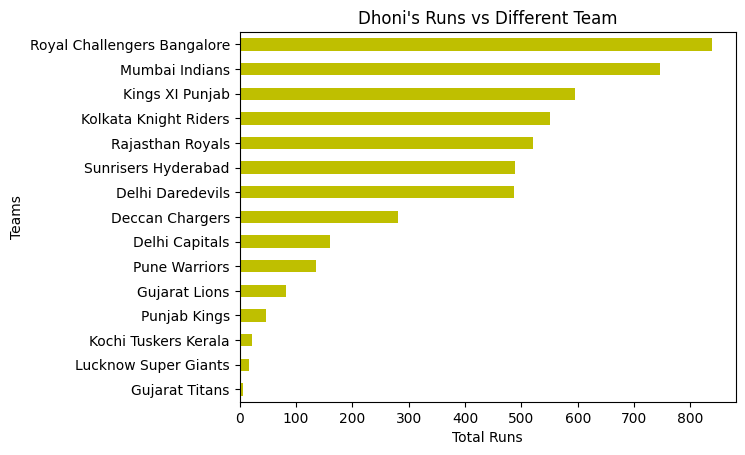

In [88]:
deliveries[deliveries.batsman=='MS Dhoni'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='y')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("Dhoni's Runs vs Different Team")
plt.plot()

[]

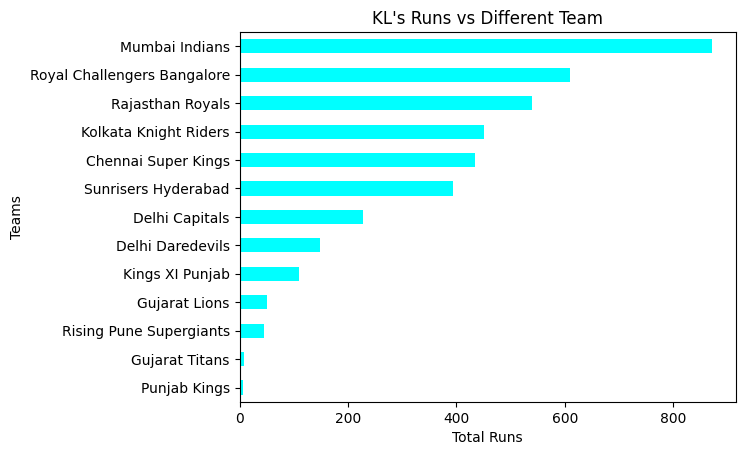

In [89]:
deliveries[deliveries.batsman=='KL Rahul'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='cyan')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("KL's Runs vs Different Team")
plt.plot()